## <CENTER><U> 1. IMPORTING BASIC NECESSARY PACKAGES</U></CENTER>

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

## <CENTER><U> 2. READING INPUT DATA </CENTER></U>

In [2]:
data = pd.read_excel("Data processing/feature_extracted.xlsx")
features = ['Max Speed(m/s)', 'Non 0 Mean Speed(m/s)', 'Speed Std', 'Max Acceleration(m/s^2)',
            'Acceleration Std', 'Non 0 Mean Acceleration(m/s^2)']

## <CENTER><U> 3. MODELING </CENTER></U>

## <b>Train, test split

In [3]:
X = data[features]
y = data['Transportation Mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=233)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## <b>K-fold validation

In [5]:
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=233)

## <b>Model learning curve

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=skf, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='f1_weighted')
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='f1_weighted')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print("SVM Macro weighted F1-score: %.2f%%" % (train_scores_mean[-1] * 100.0))
    print("SVM Macro weighted F1-score: %.2f%%" % (test_scores_mean[-1] * 100.0))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

C:\Users\gayus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\gayus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


SVM Macro weighted F1-score: 78.46%
SVM Macro weighted F1-score: 73.81%


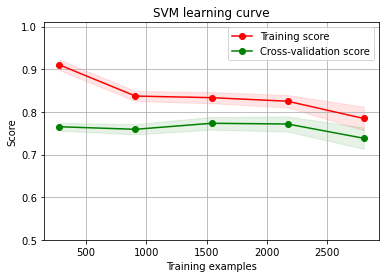

SVM Macro weighted F1-score: 81.56%


In [7]:
clf = SVC(kernel='rbf', gamma=0.5, C=10, class_weight='balanced', random_state=233)
plot_learning_curve(clf, u"SVM learning curve", X_train, y_train)
plt.show()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

test_accuracy = precision_score(y_test, y_pred, average='weighted')

print("SVM Macro weighted F1-score: %.2f%%" % (test_accuracy*100.0))